# Table of Content

- <a href=#libs> 1. Importing the Libraries </a>
- <a href=#data> 2. Data reading </a>
- <a href=#cleaning> 3. Data cleaning </a>
- <a href=#feature_eng> 4. Feature Engineering </a>
    - <a href=#new_cols> 4.1 New Columns </a>
    - <a href=#rfm> 4.2 RFM </a>
    - <a href=#feature_transform> 4.3 Feature Transformation </a>
- <a href=#dim_reduction> 5. Dimensionality Reduction (PCA) </a>        
- <a href=#cluster> 6. Clustering </a>
    - <a href=#kmeans> 6.1 KMeans </a>
    - <a href=#gaussian> 6.2 Gaussian Mixture </a>
    - <a href=#agglomerative> 6.3 Agglomerative Hierarchy </a>
    - <a href=#dbscan> 6.4 DBSCAN </a>
- <a href=#evaluation> 7. Evaluation </a>
- <a href=#profiling> 8. Profiling </a>

<a id='libs'></a>
# 1. Importing the Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
%matplotlib inline 

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)

# Setting this option will print all rows of a dataframe
pd.set_option('display.max_rows', None)

<a id='data'></a>
# 2. Data reading

## Data

from kaggle 
link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

The dataset contains 27 columns that might be divided into 4 categories:

**Customer's Information**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Purchases**

NumDealsPurchases: Number of purchases made with a discount 

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebPurchases: Number of purchases made through the company’s website

NumWebVisitsMonth: Number of visits to company’s website in the last month

In [6]:
# store original, untouched data
original_data = pd.read_csv("customer_personality_analysis.csv")

# working dataset
df = original_data.copy()

In [7]:
df.shape

(2240, 27)

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,635,88,546,172,88,88,0,0,0,0,0,1,3,10,4,8,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,11,1,6,2,1,6,0,0,0,0,0,0,2,1,2,1,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,426,49,127,111,21,42,0,0,0,0,0,0,1,2,10,8,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,11,4,20,10,3,5,0,0,0,0,0,0,2,0,4,2,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,173,43,118,46,27,15,0,0,0,0,0,0,5,3,6,5,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Complain             2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

<a id='cleaning'></a>
# 3. Data cleaning

In [16]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Complain                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
NumDealsPurchases       0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebPurchases         0
NumWebVisitsMonth       0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
Complain,2216.0,0.009477,0.096907,0.0,0.00,0.0,0.00,1.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0


#### Dt_Customer

In [23]:
# convert string to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

#### Year_Birth

In [26]:
df["Year_Birth"].min() 

1893

In [28]:
# remove all records where Year_Birth < 1930
df = df[df["Year_Birth"] >= 1930] 

#### Income

In [ ]:
fig = px.box(df, x=df["Income"])
fig.show()

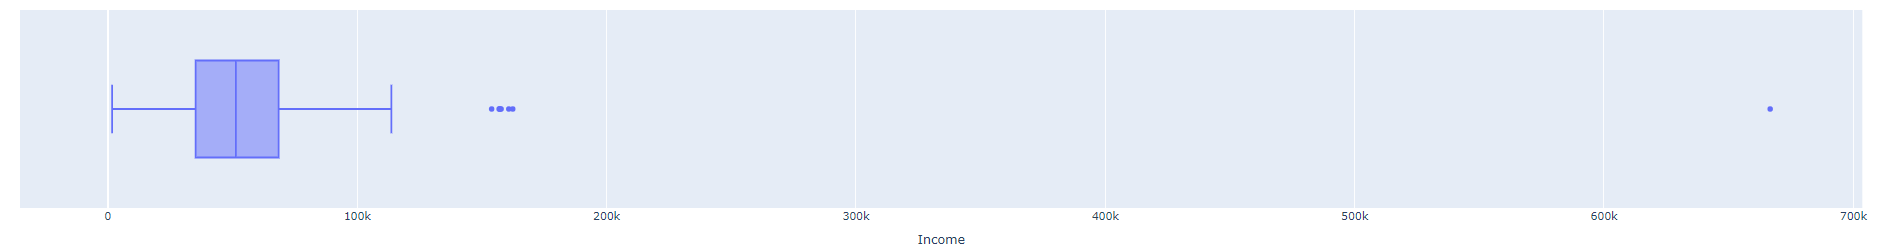

In [30]:
# removing outliers for Income
df = df[df["Income"] < 150000]
df.shape

(2205, 27)

#### Marital_status

In [33]:
df["Marital_Status"].value_counts()

Marital_Status
Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [35]:
# change Alone to Single
df["Marital_Status"] = df["Marital_Status"].replace({'Alone':'Single'})
# delete records with Absurd, YOLO
df = df[~df["Marital_Status"].isin(["Absurd","YOLO"])]

#### Education

In [38]:
df["Education"].value_counts()

Education
Graduation    1112
PhD            474
Master         363
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [40]:
#Segmentation of education levels
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [42]:
# duplicates
df.duplicated().sum()

0

<a id='feature_eng'></a>
# 4. Feature Engineering 

<a id='new_cols'></a>
## 4.1 New Columns

### Age

In [47]:
df.insert(loc = 2, column='Age',value = df["Dt_Customer"].max().year - df["Year_Birth"])

### Kids

In [50]:
df.insert(loc = 8, column='Kids',value = df["Kidhome"] + df["Teenhome"])

### Is_Parent

In [53]:
# np.where(condition, value if condition is true, value if condition is false)
df.insert(loc = 9, column='Is_Parent',value = np.where(df['Kids'] == 0, 0, 1 ))

### Customer Days
= how many days since customer enrollment with the company

In [56]:
df.insert(loc = 11, column='Customer_Days',value = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days)  

### Accepted Campaigns

In [59]:
accepted_campaigns = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]
df.insert(loc = 26, column='Accepted_Campaigns',value = accepted_campaigns)

<a id='rfm'></a>
## 4.2 RFM

### Recency (Customer last purchased)

In [63]:
# dataset already contains this info
df["Recency"].head()

0    58
1    38
2    26
3    26
4    94
Name: Recency, dtype: int64

### Frequency (How many purchases)

In [66]:
frequency = df["NumDealsPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebPurchases"]
df.insert(loc = 13, column='Frequency',value = frequency)

### Monetary (Customer Spend)

In [69]:
monetary = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df.insert(loc = 21, column='Monetary',value = monetary) 

### Customer purchase basket -  proportions of spend by product category

In [72]:
df.insert(loc = 22, column='PropWines',value = df["MntWines"] / df["Monetary"]) 
df.insert(loc = 23, column='PropFruits',value = df["MntFruits"] / df["Monetary"])
df.insert(loc = 24, column='PropMeatProducts',value = df["MntMeatProducts"] / df["Monetary"])
df.insert(loc = 25, column='PropFishProducts',value = df["MntFishProducts"] / df["Monetary"])
df.insert(loc = 26, column='PropSweetProducts',value = df["MntSweetProducts"] / df["Monetary"])
df.insert(loc = 27, column='PropGoldProds',value = df["MntGoldProds"] / df["Monetary"])

# check all features
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Kids,Is_Parent,Dt_Customer,Customer_Days,Recency,Frequency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Accepted_Campaigns,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
0,5524,1957,57,Graduate,Single,58138.0,0,0,0,0,2012-09-04,663,58,25,0,635,88,546,172,88,88,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,0,0,0,0,0,1,1,3,10,4,8,7
1,2174,1954,60,Graduate,Single,46344.0,1,1,2,1,2014-03-08,113,38,6,0,11,1,6,2,1,6,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,0,0,0,0,0,0,0,2,1,2,1,5
2,4141,1965,49,Graduate,Together,71613.0,0,0,0,0,2013-08-21,312,26,21,0,426,49,127,111,21,42,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,0,0,0,0,0,0,0,1,2,10,8,4
3,6182,1984,30,Graduate,Together,26646.0,1,0,1,1,2014-02-10,139,26,8,0,11,4,20,10,3,5,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,0,0,0,0,0,0,0,2,0,4,2,6
4,5324,1981,33,Postgraduate,Married,58293.0,1,0,1,1,2014-01-19,161,94,19,0,173,43,118,46,27,15,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,0,0,0,0,0,0,0,5,3,6,5,5


In [ ]:
To_Plot = [ "Income", "Recency", "Frequency", "Monetary", "Age", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent")
plt.show()

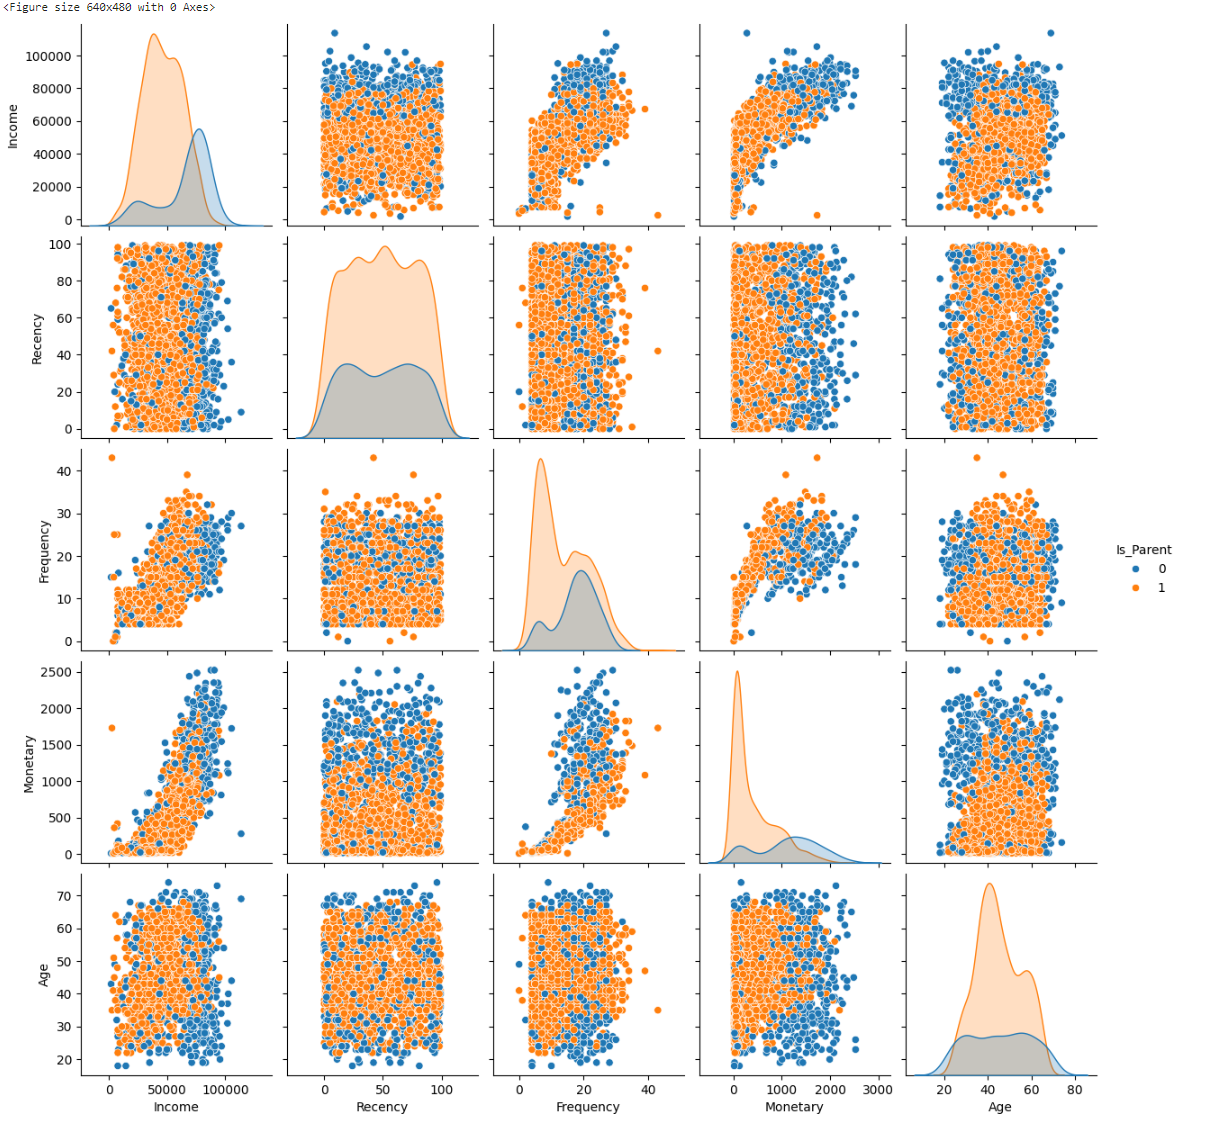

### Customer Correlation Analysis

In [ ]:
data = df[['Age', 'Income', 'Kidhome', 'Teenhome', 'Customer_Days', 'Complain','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Accepted_Campaigns', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Frequency', 'Monetary']]
df_corr = data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

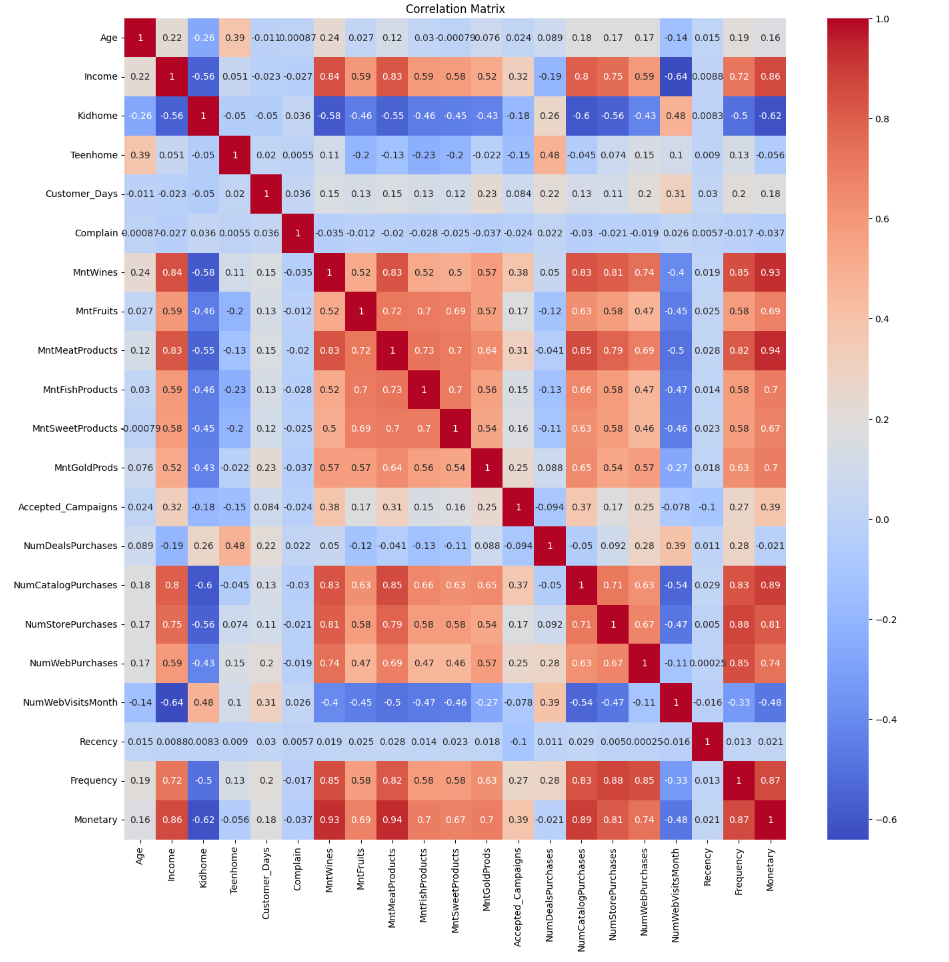

### Quick Insights

- Kidhome has moderate negative correlation with Income, Frequency and Monetary
- Customers with high income tend to shop more frequently and spend more
- Customers with teen at home tent to purchase with a discount
- Customers that buy wine, buy meat 
- Customers that buy wine or meat, have higher catalog and instore purchases

<a id='feature_transform'></a>
## 4.3 Feature Transformation

In [74]:
# reset index, because f.scaling cause that all lines with index higher than 2201 have null values (df.shape = (2201, 40))
df = df.reset_index(drop=True)

# encode dummy variables
df_features = pd.get_dummies(df, columns=['Education', 'Marital_Status']).drop(['ID', 'Year_Birth', 'Dt_Customer','Complain','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)
columns_label_encoding = ['Education_Graduate','Education_Postgraduate','Education_Undergraduate','Marital_Status_Divorced','Marital_Status_Married',\
             'Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow']
df_features[columns_label_encoding] = df_features[columns_label_encoding].apply(lambda x: x.map({True: 1, False:0}))

# apply feature scaling to non dummy variables
scaler=StandardScaler()
cols = [item for item in df_features.columns if item not in columns_label_encoding]
df_features[cols] = pd.DataFrame(scaler.fit_transform(df_features[cols]))
#df_features = pd.DataFrame(scaler.fit_transform(df_features))

df_features.head()

,Age,Income,Kidhome,Teenhome,Kids,Is_Parent,Customer_Days,Recency,Frequency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Accepted_Campaigns,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1.016749,0.315298,-0.824661,-0.930657,-1.267454,-1.586182,1.528857,0.309592,1.328458,0.973919,1.549881,1.748119,2.460069,1.479104,0.855523,1.679201,-0.292851,0.088451,0.726411,0.444955,0.058168,-0.603556,0.616742,0.362672,2.632148,-0.561918,1.425020,0.689322,1,0,0,0,0,1,0,0
1,1.273178,-0.254008,1.036959,0.906451,1.402083,0.630445,-1.187736,-0.382021,-1.165696,-0.873863,-0.638067,-0.731372,-0.652429,-0.635541,-0.735739,-0.962870,-0.228357,-0.223290,-0.212401,0.031146,-0.227038,0.936642,-0.503265,-0.167721,-0.587576,-1.178460,-1.131785,-0.140201,1,0,0,0,0,1,0,0
2,0.332936,0.965746,-0.824661,-0.930657,-1.267454,-1.586182,-0.204823,-0.796989,0.803373,0.355031,0.569077,-0.175782,1.343231,-0.149416,-0.037136,0.281728,0.392515,0.244863,-0.688657,0.914831,-0.390686,-0.606292,-0.503265,-0.698114,-0.229829,1.287706,1.425020,-0.554962,1,0,0,0,0,0,1,0
3,-1.291120,-1.204845,1.036959,-0.930657,0.067315,0.630445,-1.059315,-0.796989,-0.903154,-0.873863,-0.562621,-0.667089,-0.505959,-0.586928,-0.755145,-0.919666,-1.104920,0.465915,1.049238,1.499596,0.093965,-0.237160,-0.503265,-0.167721,-0.945324,-0.561918,-0.766527,0.274560,1,0,0,0,0,0,1,0
4,-1.034691,0.322780,1.036959,-0.930657,0.067315,0.630445,-0.950652,1.554495,0.540831,-0.394150,0.418184,-0.217107,0.153159,-0.003578,-0.561088,-0.306506,-0.217194,0.939748,0.254391,0.478717,0.214993,-0.776821,-0.503265,1.423459,0.127918,0.054623,0.329247,-0.140201,0,1,0,0,1,0,0,0


<a id='dim_reduction'></a>
# 5. Dimensionality Reduction (PCA)

In [123]:
pca = PCA(n_components=3)
pca.fit(df_features)
pca_df = pd.DataFrame(pca.transform(df_features), columns=(["PCA_1","PCA_2", "PCA_3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA_1,2201.0,-7.425026e-17,3.127644,-5.329451,-3.045341,-0.473786,2.851532,7.922877
PCA_2,2201.0,-5.810890e-17,2.303527,-5.121513,-2.034819,0.281414,1.989740,5.808094
PCA_3,2201.0,0.000000e+00,1.669861,-3.186754,-1.440656,-0.019344,1.354120,5.133183


In [ ]:
px.scatter_3d(
    pca_df,
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    title = 'PCA workspace',
    width = 800,
    height = 800
)

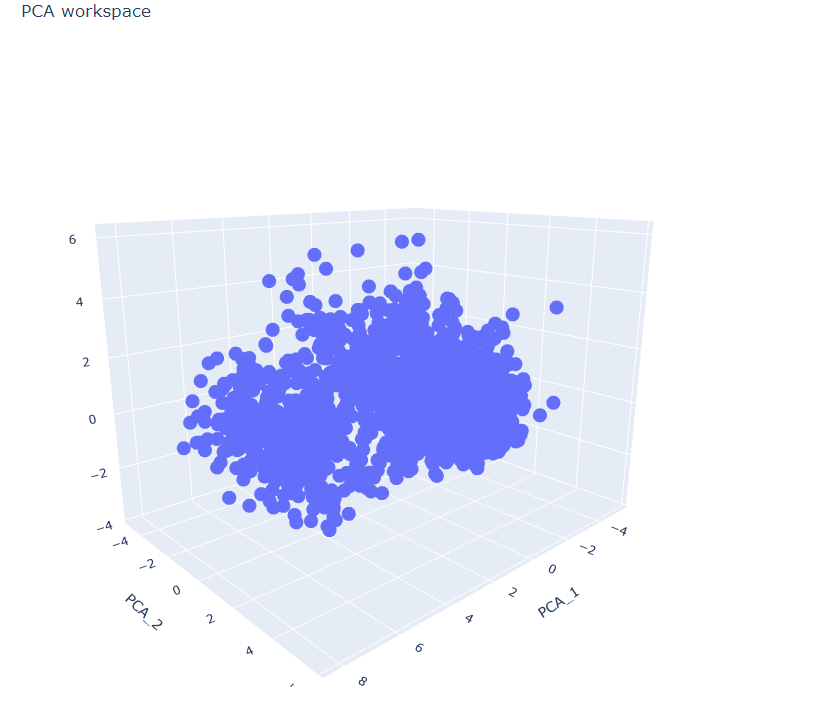

<a id='cluster'></a>
# 6. Clustering

### Elbow method

In [ ]:
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(pca_df)       
visualizer.show()    

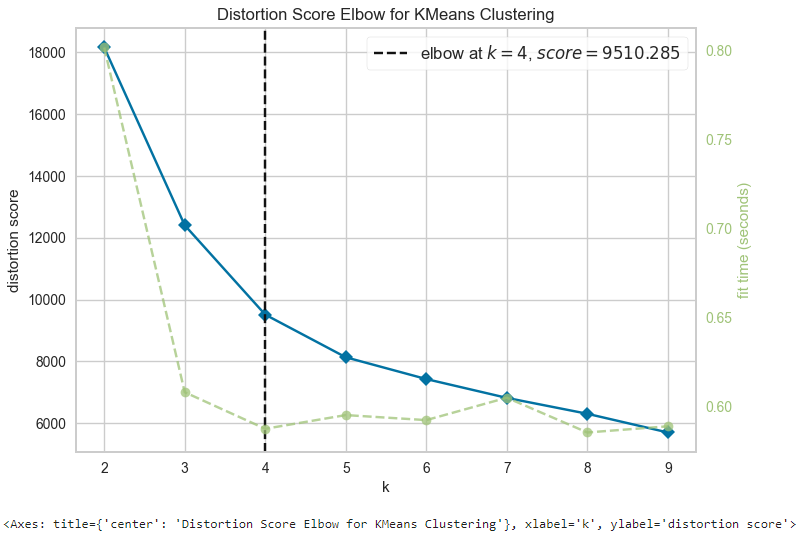

<a id='kmeans'></a>
## 6.1 KMeans

In [125]:
kmeans_model=KMeans(n_clusters=4)
kmeans_model.fit(pca_df[["PCA_1","PCA_2","PCA_3"]])
kmeans_labels = kmeans_model.labels_

In [127]:
pca_df = pca_df.assign(Kmeans_Labels = lambda x: pd.Categorical(kmeans_labels))
df_features = df_features.assign(Kmeans_Labels = lambda x: pd.Categorical(kmeans_labels))

In [129]:
df_features.head()

,Age,Income,Kidhome,Teenhome,Kids,Is_Parent,Customer_Days,Recency,Frequency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,Accepted_Campaigns,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kmeans_Labels,Gaussian_Labels,Agglomerative_Labels
0,1.016749,0.315298,-0.824661,-0.930657,-1.267454,-1.586182,1.528857,0.309592,1.328458,0.973919,1.549881,1.748119,2.460069,1.479104,0.855523,1.679201,-0.292851,0.088451,0.726411,0.444955,0.058168,-0.603556,0.616742,0.362672,2.632148,-0.561918,1.425020,0.689322,1,0,0,0,0,1,0,0,2,2,1
1,1.273178,-0.254008,1.036959,0.906451,1.402083,0.630445,-1.187736,-0.382021,-1.165696,-0.873863,-0.638067,-0.731372,-0.652429,-0.635541,-0.735739,-0.962870,-0.228357,-0.223290,-0.212401,0.031146,-0.227038,0.936642,-0.503265,-0.167721,-0.587576,-1.178460,-1.131785,-0.140201,1,0,0,0,0,1,0,0,3,3,3
2,0.332936,0.965746,-0.824661,-0.930657,-1.267454,-1.586182,-0.204823,-0.796989,0.803373,0.355031,0.569077,-0.175782,1.343231,-0.149416,-0.037136,0.281728,0.392515,0.244863,-0.688657,0.914831,-0.390686,-0.606292,-0.503265,-0.698114,-0.229829,1.287706,1.425020,-0.554962,1,0,0,0,0,0,1,0,2,2,1
3,-1.291120,-1.204845,1.036959,-0.930657,0.067315,0.630445,-1.059315,-0.796989,-0.903154,-0.873863,-0.562621,-0.667089,-0.505959,-0.586928,-0.755145,-0.919666,-1.104920,0.465915,1.049238,1.499596,0.093965,-0.237160,-0.503265,-0.167721,-0.945324,-0.561918,-0.766527,0.274560,1,0,0,0,0,0,1,0,1,0,2
4,-1.034691,0.322780,1.036959,-0.930657,0.067315,0.630445,-0.950652,1.554495,0.540831,-0.394150,0.418184,-0.217107,0.153159,-0.003578,-0.561088,-0.306506,-0.217194,0.939748,0.254391,0.478717,0.214993,-0.776821,-0.503265,1.423459,0.127918,0.054623,0.329247,-0.140201,0,1,0,0,1,0,0,0,3,3,3


In [258]:
px.scatter_3d(
    pca_df,
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    color = 'Kmeans_Labels',
    title = 'KMeans',
    width = 800,
    height = 800
)

<a id='gaussian'></a>
## 6.2 Gaussian Mixture

In [133]:
gaussian_model = GaussianMixture(n_components=4)
gaussian_model.fit(pca_df[["PCA_1","PCA_2","PCA_3"]])
gaussian_labels = gaussian_model.predict(pca_df[["PCA_1","PCA_2","PCA_3"]])

In [135]:
pca_df = pca_df.assign(Gaussian_Labels = lambda x: pd.Categorical(gaussian_labels))
df_features = df_features.assign(Gaussian_Labels = lambda x: pd.Categorical(gaussian_labels))

In [260]:
px.scatter_3d(
    pca_df,
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    color = 'Gaussian_Labels',
    title = 'Gaussian Mixture',
    width = 800,
    height = 800
)

<a id='agglomerative'></a>
## 6.3  Agglomerative Hierarchy 

In [139]:
agglomerative_model = AgglomerativeClustering(n_clusters=4)
agglomerative_labels = agglomerative_model.fit_predict(pca_df[["PCA_1","PCA_2","PCA_3"]])

In [141]:
pca_df = pca_df.assign(Agglomerative_Labels = lambda x: pd.Categorical(agglomerative_labels))
df_features = df_features.assign(Agglomerative_Labels = lambda x: pd.Categorical(agglomerative_labels))

In [262]:
px.scatter_3d(
    pca_df,
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    color = 'Agglomerative_Labels',
    title = 'Agglomerative Hierarchy clustering',
    width = 800,
    height = 800
)

<a id='dbscan'></a>
## 6.4  DBSCAN

In [215]:
dbscan_model = DBSCAN(eps=0.85, min_samples=6)
dbscan_labels = dbscan_model.fit_predict(pca_df[["PCA_1","PCA_2","PCA_3"]])

In [217]:
pca_df = pca_df.assign(DBSCAN_Labels = lambda x: pd.Categorical(dbscan_labels))
df_features = df_features.assign(DBSCAN_Labels = lambda x: pd.Categorical(dbscan_labels))

In [219]:
px.scatter_3d(
    pca_df,
    x = "PCA_1",
    y = "PCA_2",
    z = "PCA_3",
    color = 'DBSCAN_Labels',
    title = 'DBSCAN',
    width = 800,
    height = 800
)

<a id='evaluation'></a>
# 7. Evaluation

## Comparing the outcomes

In [ ]:
labels = [kmeans_labels, gaussian_labels, agglomerative_labels, dbscan_labels]
methods = ['KMeans','Gaussian Mixture','Agglomerative Hierarchy', 'DBSCAN']

for label, method in zip(labels, methods):
    fig = px.scatter(
        df_features,
        x = 'Monetary',
        y = 'Income',
        color = label, 
        opacity = 0.4,
        title = method,
    )
    fig.show()

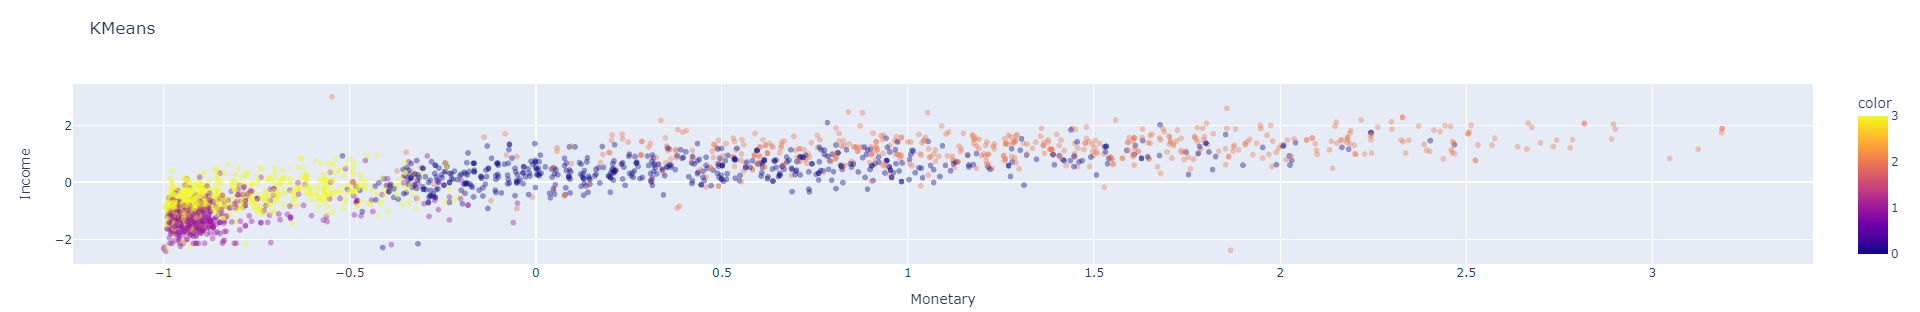

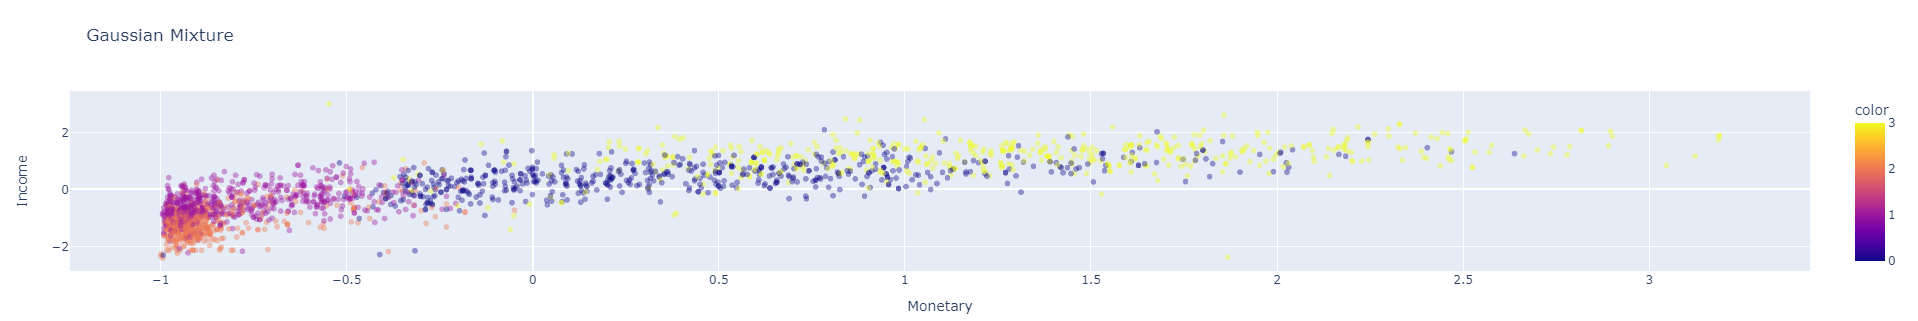

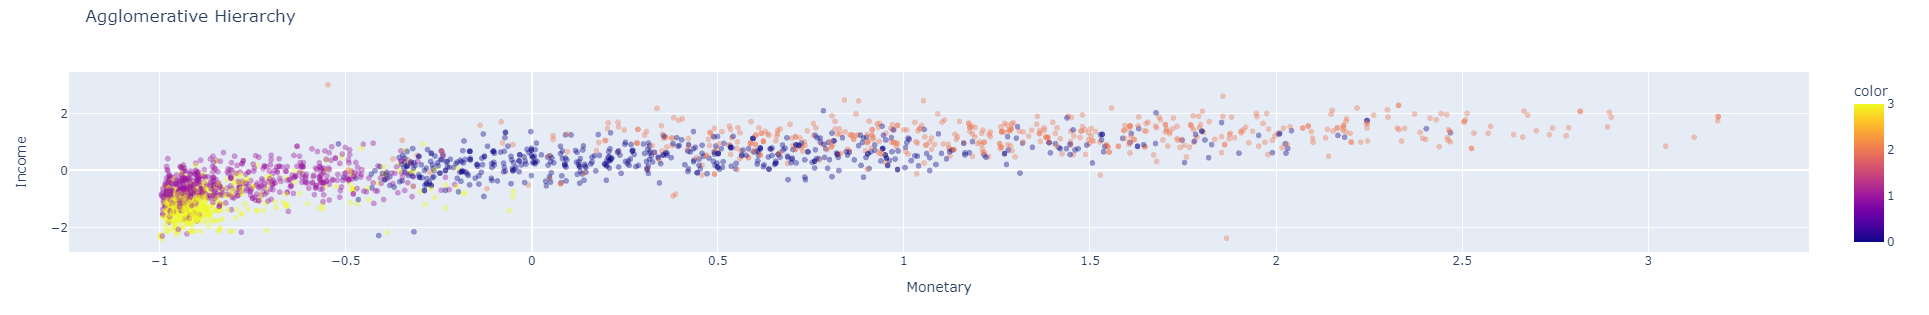

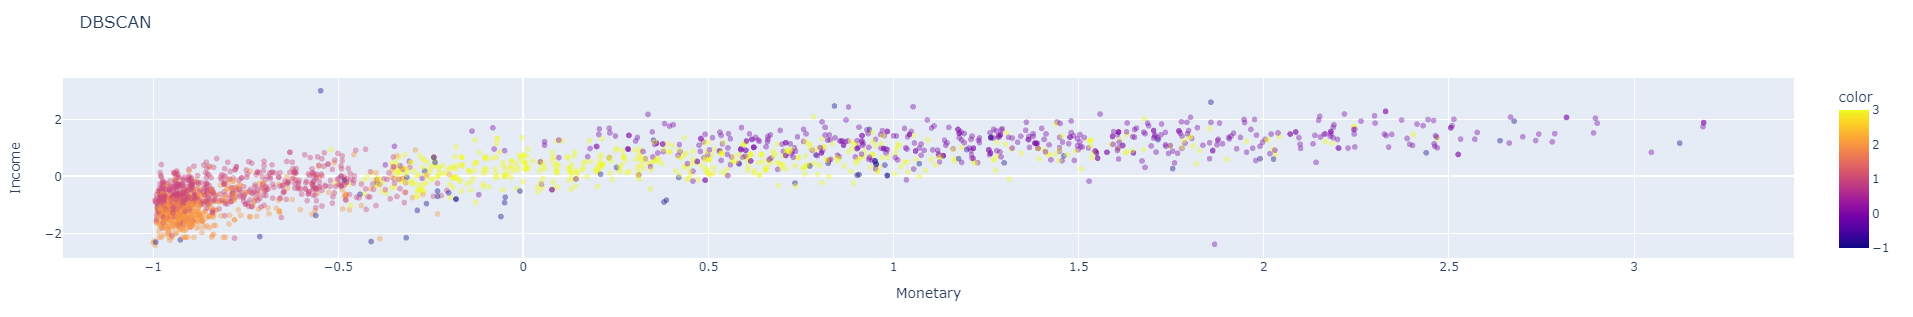

## Metrics

### Silhouette score

The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [249]:
from sklearn.metrics import silhouette_score

dataframe = pca_df[["PCA_1","PCA_2","PCA_3"]]

print(f'Silhouette Score:')
print("----------------------")
for label,method in zip(labels, methods):
    silhouette = silhouette_score(dataframe, label)
    print(f'{method}: {silhouette}')

Silhouette Score:
----------------------
KMeans: 0.5528712265544747
Gaussian Mixture: 0.5488743231768293
Agglomerative Hierarchy: 0.5527252943749407
DBSCAN: 0.5294143619971003


### Davies-Bouldin Index

The Davies-Bouldin Index measures the average similarity ratio of each cluster with its most similar cluster. A lower Davies-Bouldin index indicates better clustering.

In [251]:
from sklearn.metrics import davies_bouldin_score

print(f'Davies-Bouldin Index:')
print("----------------------")
for label,method in zip(labels, methods):
    db_index = davies_bouldin_score(dataframe, label)
    print(f'{method}: {db_index}')

Davies-Bouldin Index:
----------------------
KMeans: 0.6409496411468449
Gaussian Mixture: 0.6475070672617369
Agglomerative Hierarchy: 0.6407675358236636
DBSCAN: 1.6511427657777786


### Calinski-Harabasz Index

The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, evaluates the ratio of the sum of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined clusters.

In [255]:
from sklearn.metrics import calinski_harabasz_score

print(f'Calinski-Harabasz Index:')
print("------------------------------")
for label,method in zip(labels, methods):
    ch_index = calinski_harabasz_score(dataframe, label)
    print(f'{method}: {ch_index}')

Calinski-Harabasz Index:
------------------------------
KMeans: 3401.2165379406715
Gaussian Mixture: 3322.7215178055026
Agglomerative Hierarchy: 3397.935910967294
DBSCAN: 2326.0011168331293


<a id='profiling'></a>
# 8. Profiling

Based on **KMeans clustering**.

In [265]:
df["kmeans_label"] = kmeans_labels

In [267]:
grouped = df.groupby(df["kmeans_label"])
labels = grouped.groups.keys()

In [273]:
dataframe_to_explain = pd.DataFrame()
for column in df.columns:
    if column in {"ID", "Year_Birth", "Is_Parent", "Dt_Customer", "kmeans_label"}:
        continue
    elif column in {"Education", "Marital_Status"}:
        modes=[]
        for l in labels:
            modes.append(grouped.get_group(l)[column].mode()[0])
        dataframe_to_explain[column] = modes
    else:
        dataframe_to_explain[column] = grouped[column].median()

In [275]:
dataframe_to_explain

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Kids,Customer_Days,Recency,Frequency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Monetary,PropWines,PropFruits,PropMeatProducts,PropFishProducts,PropSweetProducts,PropGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Accepted_Campaigns,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth
kmeans_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49.0,Graduate,Married,61010.0,0.0,1.0,1.0,447.0,49.0,22.0,0.0,488.0,16.0,135.0,20.0,15.0,48.0,797.0,0.639076,0.019022,0.170616,0.025330,0.019022,0.064125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,8.0,7.0,6.0
1,36.0,Graduate,Married,26997.0,1.0,0.0,1.0,360.0,50.0,7.0,0.0,8.0,4.0,14.0,7.0,5.0,12.0,59.0,0.168539,0.083916,0.240000,0.129032,0.076923,0.223684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,7.0
2,44.5,Graduate,Married,76456.0,0.0,0.0,0.0,337.0,52.0,20.0,0.0,553.5,53.5,425.5,89.0,55.5,54.0,1341.5,0.410690,0.043577,0.326574,0.063604,0.045263,0.046580,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,8.0,5.0,2.0
3,46.0,Postgraduate,Married,40887.0,1.0,1.0,1.0,284.0,48.0,9.0,0.0,51.0,1.0,19.0,2.0,1.0,9.0,92.0,0.563380,0.014124,0.221344,0.022556,0.014493,0.091603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,7.0
